<a href="https://colab.research.google.com/github/DEEPAK4151/python-practice-colab1/blob/main/17feb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub


In [88]:
path = kagglehub.dataset_download("neuromusic/avocado-prices")
da=pd.read_csv(f"{path}/avocado.csv")
da.dropna(inplace=True)

Using Colab cache for faster access to the 'avocado-prices' dataset.


In [89]:
da.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [91]:
df = da[['AveragePrice', 'Total Volume','Total Bags']].copy()
df.dropna(inplace=True)
df.head()

,AveragePrice,Total Volume,Total Bags
0,1.33,64236.62,8696.87
1,1.35,54876.98,9505.56
2,0.93,118220.22,8145.35
3,1.08,78992.15,5811.16
4,1.28,51039.60,6183.95


In [93]:
df.corr()

,AveragePrice,Total Volume,Total Bags
AveragePrice,1.000000,-0.192752,-0.177088
Total Volume,-0.192752,1.000000,0.963047
Total Bags,-0.177088,0.963047,1.000000


<Axes: xlabel='Total Volume', ylabel='Total Bags'>

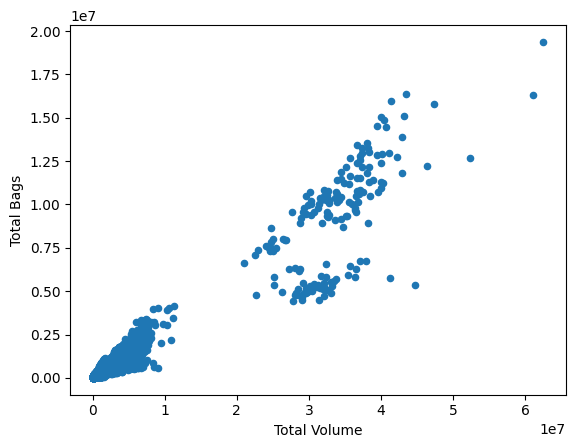

In [94]:
df.plot(x='Total Volume',y='Total Bags',kind='scatter')

In [99]:
df.shape

(18249, 3)

In [61]:
X=df.iloc[:,0:1]
y=df.iloc[:,2]

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [63]:
print(X_train.shape)
print(X_test.shape)

(14599, 1)
(3650, 1)


In [64]:
print(y_train.shape,y_test.shape)

(14599,) (3650,)


In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [67]:
y_pred=regressor.predict(X_test)

In [68]:
print(regressor.coef_[0])
print(regressor.intercept_)

-442263.5449828694
864892.689173451


In [69]:
df_error=pd.DataFrame()
df_error['y_pred']=y_pred
df_error['y_test']=y_test
df_error.shape

(3650, 2)

In [70]:
df_error

,y_pred,y_test
0,418206.508741,NaN
1,-19634.400792,NaN
2,329753.799744,NaN
3,276682.174346,NaN
4,157271.017201,NaN
...,...,...
3645,422629.144191,NaN
3646,298795.351595,NaN
3647,-85973.932540,NaN
3648,320908.528845,NaN


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [79]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

310223.88949383725

In [80]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

795239324241.557

In [81]:
mse=mean_squared_error(y_test,y_pred)
np.sqrt(mse)

np.float64(891761.9212780712)

In [82]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.031939652838972266

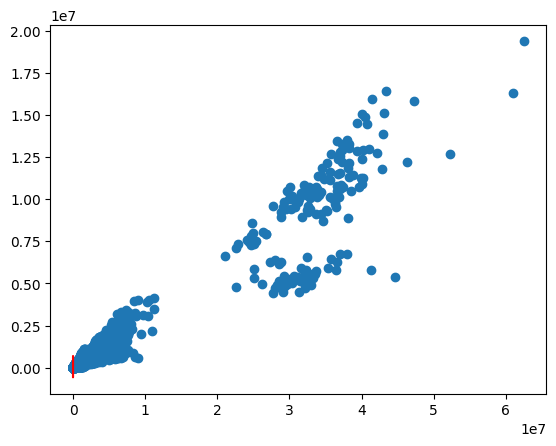

In [86]:
plt.plot(X_train,regressor.predict(X_train), color='red')
plt.scatter(df['Total Volume'],df['Total Bags'])

In [102]:
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")
da=pd.read_csv(f"{path}/StudentsPerformance.csv")
da.dropna(inplace=True)

Using Colab cache for faster access to the 'students-performance-in-exams' dataset.


In [103]:
da.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [107]:
df=da[['math score','reading score']].copy()

In [130]:
df.shape

(1000, 2)

In [109]:
df.corr()

,math score,reading score
math score,1.00000,0.81758
reading score,0.81758,1.00000


In [117]:
X=df.iloc[:,0:1].values
y=df.iloc[:,1].values

In [118]:
print(X.shape,y.shape)

(1000, 1) (1000,)


In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [120]:
print(X_train.shape,y_train.shape,y_test.shape)

(800, 1) (800,) (200,)


In [121]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [122]:
regressor.fit(X_train,y_train)

LinearRegression()

In [123]:
y_pred=regressor.predict(X_test)


In [124]:
print(regressor.coef_[0],regressor.intercept_)

0.8092464808052089 15.660851229036673


In [129]:
df_error=pd.DataFrame()
df_error['y_pred']=y_pred
df_error['y_test']=y_test
df_error.shape

(200, 2)

In [131]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [133]:
mean_squared_error(y_test,y_pred)


76.48919676460224

In [134]:
mean_absolute_error(y_test,y_pred)

7.3771144520794705

In [136]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [138]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5499891642994976

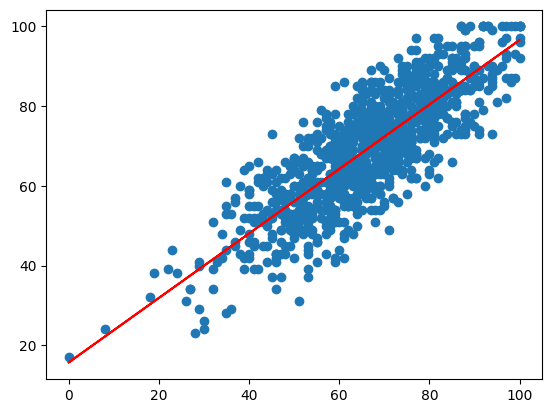

In [140]:
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.scatter(df['math score'],df['reading score'])